In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path


from wufam.data.prepare_data import read_kf_data
from wufam.dataset import Dataset

PATH = Path("../data/kf_data")
START = "1970-01-01"
END = "2024-12-31"
DATASET = Dataset.BM_6_M
FACTORS_DATASET = Dataset.FACTORS_M
WEIGHTING = "value_weighted"
FACTOR_ANNUALIZE = 12

In [3]:
portfolios_total_r, portfolios_xs_r, factors_df, rf = read_kf_data(
    portfolios_filename=PATH / DATASET,
    factors_filename=PATH / FACTORS_DATASET,
    start_date=START,
    end_date=END,
    weighting=WEIGHTING,
)

In [4]:
assert (
    portfolios_total_r.shape[0]
    == portfolios_xs_r.shape[0]
    == factors_df.shape[0]
    == rf.shape[0]
)

In [9]:
from wufam.features.dnk_features import create_dnk_features

features = create_dnk_features(
    ret=portfolios_total_r,
    verbose=True,
).iloc[1:]

  0%|          | 0/660 [00:00<?, ?it/s]/Users/buchkovv/wufam/wufam/features/dnk_features.py:13: RuntimeWarning: Mean of empty slice
  return np.nanmean(non_diag)
  0%|          | 0/660 [00:00<?, ?it/s]/Users/buchkovv/wufam/.venv/lib/python3.12/site-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/Users/buchkovv/wufam/.venv/lib/python3.12/site-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
  0%|          | 0/660 [00:00<?, ?it/s]/Users/buchkovv/wufam/.venv/lib/python3.12/site-packages/pandas/core/frame.py:11218: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/Users/buchkovv/wufam/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Use

In [10]:
features

,avg_corr,avg_vol,ewma,lw_shrinkage,momentum_feature,trace,universe_vol
date,,,,,,,
1970-02-01,1.000000,0.080796,-0.033074,-7.439074e-17,0.500000,0.041820,0.036104
1970-03-01,1.000000,0.044606,0.019511,0.000000e+00,0.750000,0.012347,0.052516
1970-04-01,1.000000,0.080489,-0.047223,0.000000e+00,0.250000,0.040559,0.074713
1970-05-01,1.000000,0.032224,-0.161809,0.000000e+00,0.000000,0.007840,0.093738
1970-06-01,0.333333,0.016760,-0.160963,0.000000e+00,0.000000,0.001850,0.088044
...,...,...,...,...,...,...,...
2024-08-01,0.333333,0.054139,0.071795,0.000000e+00,0.750000,0.024265,0.073362
2024-09-01,-0.066667,0.013010,0.041659,0.000000e+00,0.666667,0.001452,0.073362
2024-10-01,0.333333,0.016108,0.008234,0.000000e+00,0.416667,0.001778,0.073316


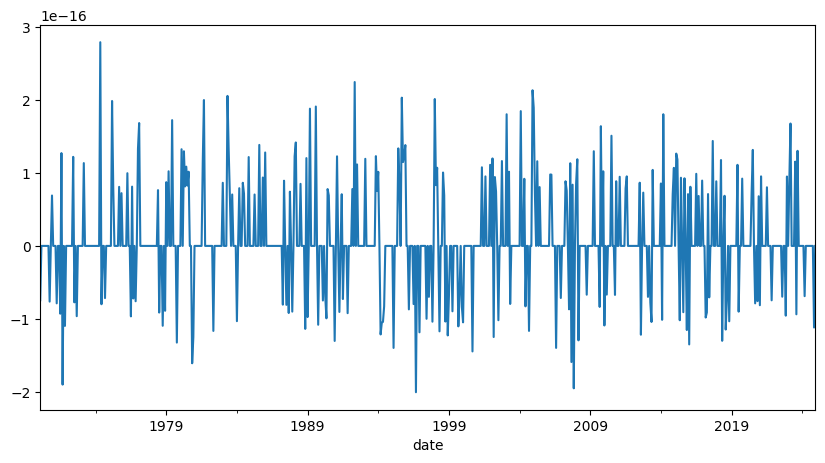

In [17]:
features["lw_shrinkage"].plot(figsize=(10, 5));